# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)

Text(0.5, 1.0, 'Saturday Polynomial Regression - Actual vs. Predicted')

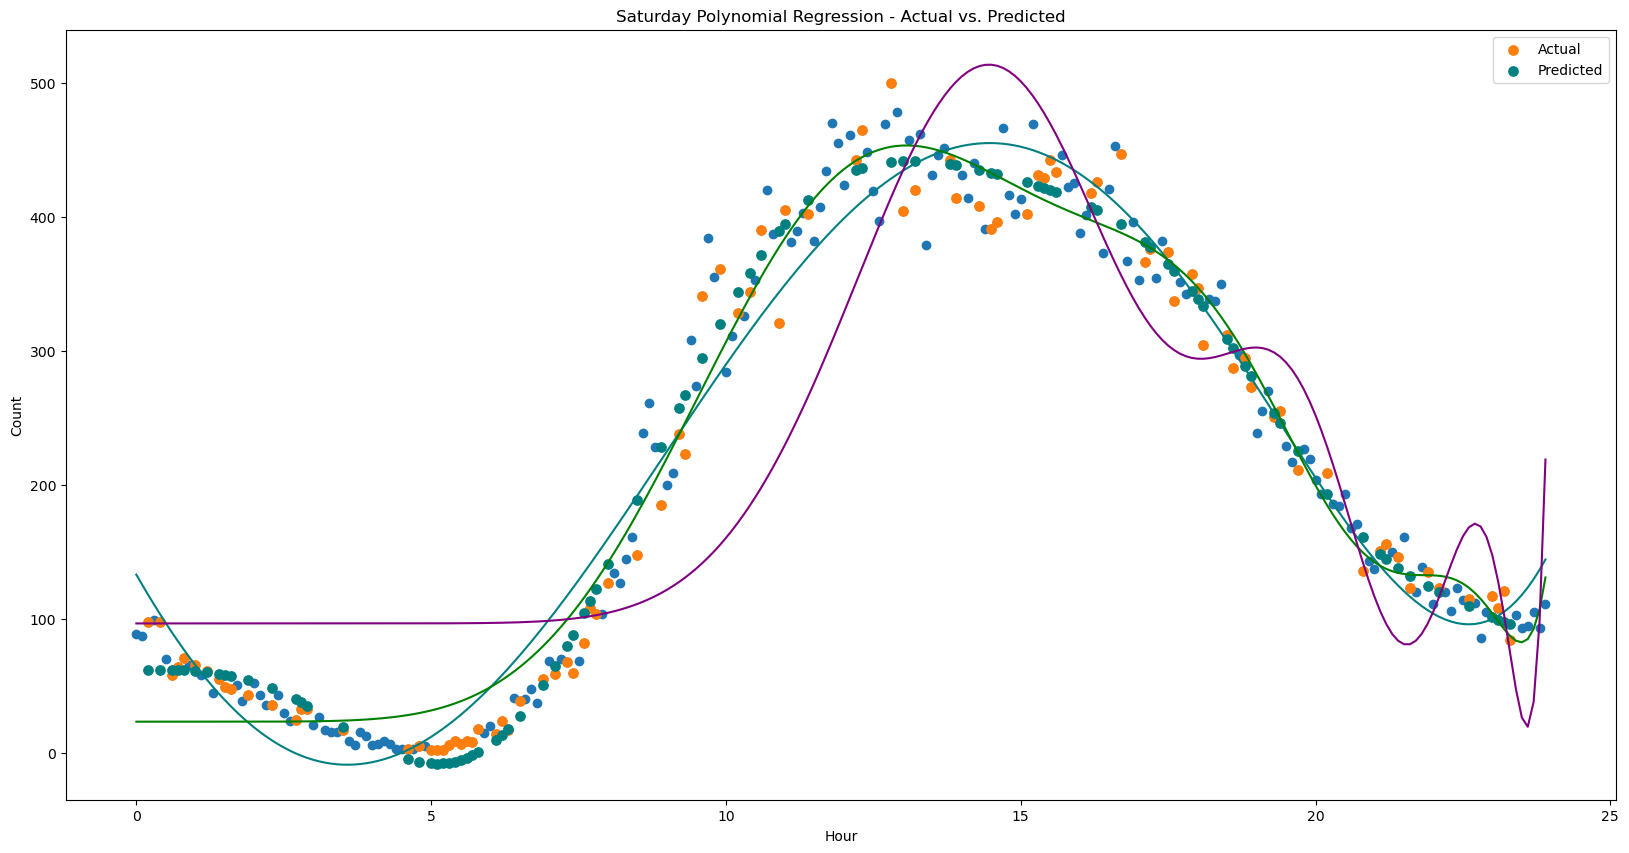

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
import sklearn
from sklearn import linear_model
import sklearn.metrics as metrics


day_hour_count = pd.read_csv('~/Desktop/bikeshare_hour_count.csv')
day_hour_count

saturday = day_hour_count[["hour","saturday"]].copy()
sunday = day_hour_count[["hour","sunday"]].copy()

saturday = saturday.dropna()

#saturday 
sat_hour = saturday['hour'].to_numpy()
sat_y = saturday['saturday'].to_numpy()

sat_hour = sat_hour.reshape(-1,1)
sat_y = sat_y.reshape(-1, 1)

#n=5 
poly_5 = PolynomialFeatures(degree=5)
sat_hour_5 = poly_5.fit_transform(sat_hour)

sat_5 = linear_model.LinearRegression()
sat_5.fit(sat_hour_5, sat_y)

#n=15
poly_15 = PolynomialFeatures(degree=15)
sat_hour_15 = poly_15.fit_transform(sat_hour)

sat_15 = linear_model.LinearRegression()
sat_15.fit(sat_hour_15, sat_y)

#n=20
poly_20 = PolynomialFeatures(degree=20)
sat_hour_20 = poly_20.fit_transform(sat_hour)

sat_20 = linear_model.LinearRegression()
sat_20.fit(sat_hour_20, sat_y)

plt.scatter(sat_hour, sat_y)
plt.plot(sat_hour, sat_5.predict(sat_hour_5), c='teal')
plt.plot(sat_hour, sat_15.predict(sat_hour_15), c='green')
plt.plot(sat_hour, sat_20.predict(sat_hour_20), c='purple')



#Saturday/Sunday
saturday = saturday.dropna()
sunday = sunday.dropna()


(
    metrics.mean_squared_error(saturday['saturday'], sat_5.predict(sat_hour_5)),
    metrics.mean_absolute_error(saturday['saturday'], sat_5.predict(sat_hour_5)),
    metrics.mean_absolute_percentage_error(saturday['saturday'], sat_5.predict(sat_hour_5))
)


(
    metrics.mean_squared_error(sunday['sunday'], sat_5.predict(sat_hour_5)),
    metrics.mean_absolute_error(sunday['sunday'], sat_5.predict(sat_hour_5)),
    metrics.mean_absolute_percentage_error(sunday['sunday'], sat_5.predict(sat_hour_5))
)
from sklearn.model_selection import train_test_split
sat2 = saturday.dropna()
satx = sat2[['hour']] 
saty = sat2[['saturday']] 
satx_train, satx_test, saty_train, saty_test = train_test_split(satx, saty, test_size=0.4, random_state=36)


satx_train12 = PolynomialFeatures(degree=12).fit_transform(satx_train)
satx_test12 = PolynomialFeatures(degree=12).fit_transform(satx_test)

linear12 = linear_model.LinearRegression().fit(satx_train12, saty_train)

size = 45
plt.scatter(satx_test, saty_test, s=size, label = 'Actual')
plt.scatter(satx_test, linear12.predict(satx_test12), c='Teal', s=size, label = 'Predicted')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.title('Saturday Polynomial Regression - Actual vs. Predicted')


    
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')


df_car = pd.read_csv('~/Desktop/car_evaluation.csv')

df_car.columns = col_names

col_names
df_car.head()

df_car.info()

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df_car[col].value_counts())   

    
df_car['class'].value_counts()

df_car.isnull().sum()

x = df_car.drop(['class'], axis=1)
y = df_car['class']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split

trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.30, random_state = 45)

trainx.shape, testx.shape

trainx.dtypes

trainx.head()

,buying,maint,doors,persons,lug_boot,safety
468,high,vhigh,3,4,small,med
459,high,vhigh,3,2,small,med
1386,low,vhigh,5more,4,small,med
243,vhigh,med,3,2,small,med
1341,low,vhigh,3,more,small,med


In [52]:
! pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [73]:
import sklearn
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

trainx = encoder.fit_transform(trainx)

testx = encoder.transform(testx)
trainx.head()
testx.head()

,buying,maint,doors,persons,lug_boot,safety
467,1,1,1,1,1,2
617,1,4,4,3,2,2
229,3,2,3,1,3,3
1473,2,4,4,1,2,1
872,4,1,3,1,1,2


In [75]:
from sklearn.tree import DecisionTreeClassifier

car_dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
car_dtc.fit(X_train, y_train)

ypred_gini = car_dtc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.5f}'. format(accuracy_score(testy, ypred_gini)))

Model accuracy score with criterion gini index: 0.75337


In [76]:
ypred_train_gini = car_dtc.predict(trainx)

ypred_train_gini

print('Training-set accuracy score: {0:0.5f}'. format(accuracy_score(trainy, ypred_train_gini)))

car_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

car_en.fit(trainx, trainy)


Training-set accuracy score: 0.78311


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [79]:
ypred_gini = car_dtc.predict(testx)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.5f}'. format(accuracy_score(testy, ypred_gini)))


Model accuracy score with criterion gini index: 0.75337


In [81]:
car_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

car_en.fit(trainx, trainy)

ypred_en = car_en.predict(testx)


print('Model accuracy score with criterion entropy: {0:0.5f}'. format(accuracy_score(testy, ypred_en)))

Model accuracy score with criterion entropy: 0.7553


In [82]:
ypred_train_en = car_en.predict(trainx)

ypred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [83]:
print('Training-set accuracy score: {0:0.5f}'. format(accuracy_score(trainy, ypred_train_en)))

Training-set accuracy score: 0.77483


In [84]:
ypred_en = car_en.predict(testx)

Confusion matrix

 [[ 68   0  50   0]
 [  7   0  15   0]
 [ 30   0 324   0]
 [ 25   0   0   0]]


In [85]:
from sklearn.metrics import classification_report

print(classification_report(testy, ypred_en))

              precision    recall  f1-score   support

         acc       0.52      0.58      0.55       118
        good       0.00      0.00      0.00        22
       unacc       0.83      0.92      0.87       354
       vgood       0.00      0.00      0.00        25

    accuracy                           0.76       519
   macro avg       0.34      0.37      0.36       519
weighted avg       0.69      0.76      0.72       519



    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [86]:
from sklearn.metrics import confusion_matrix

cm_car = confusion_matrix(testy, ypred_en)

print('Confusion matrix\n\n', cm_car)

Confusion matrix

 [[ 68   0  50   0]
 [  7   0  15   0]
 [ 30   0 324   0]
 [ 25   0   0   0]]
